# Basic 2-dimensional ODE solution

In [34]:
# This is a standard initalisation code - no need to change this
# It loads basic fast array code, plot library and ODE solver
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# %matplotlib inline
# %config InlineBackend.figure_formats={'retina','png'}

## System definition

To solve the equations
$$
\begin{eqnarray*}
\frac{dx}{dt} &=& f_1(x, y)\\
\frac{dy}{dt} &=& f_2(x, y)
\end{eqnarray*}
$$
define the functions $f_{1,2}$ here.

**Note**, that the functions can explicitly depend on the free variable, to solve the *non-autonomous* equation $\dot{x_i}=f_i(t,x_1,x_2)$, but according to our convention this is no longer 2dim ODE, but 3dim ODE.

In [35]:
## Not a very good programmin style, the ODE_2D_programmers.ipynb contains a nicer implementation

# Parameter
I=0
A=0.7
B=0.8
EPS=0.08

In [36]:
def f(t, X):
    v = X[0]
    w = X[1]
    return [ v-v**3/3-w+I,
             EPS*(v+A-B*w) ]

*Advanced programmers only:* For complicated situations there are many features of `solve_ivp` described in in [SciPy](https://www.scipy.org/) documentation [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html?highlight=solve_ivp#scipy.integrate.solve_ivp).

Two additional parameters are, however very useful: `rtol` and `atol`.  Setting them to small numbers like `solve_ivp(f, tspan, x0, t_eval=t_eval, rtol=1e-8, atol=1e-8)` asks the solver to aim for higher relative and absolute precision.

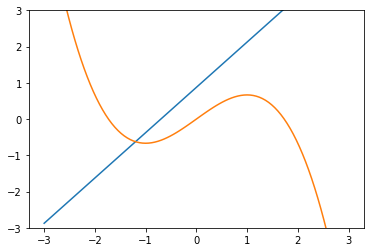

In [48]:
I=0

fig = plt.figure()
ax = fig.subplots(1)

vrange = np.linspace(-3, 3, num=100)

ax.set_ylim(-3,3)

ax.plot(vrange, (vrange+A)/B)
ax.plot(vrange, vrange-vrange**3/3+I)

## Basic analysis

Let us plot the direction field for the system.

In [47]:
I=0

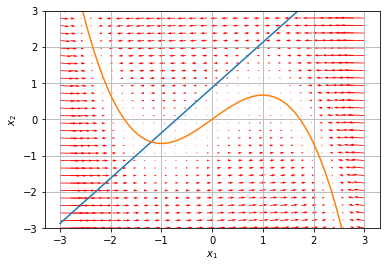

In [50]:
x1range = np.linspace(-3, 3, num=30)   # Select the required x_1 range
x2range = np.linspace(-3, 3, num=30) # Select the required x_2 range
t = 0

# Fill the components of the vector field in the xrid points
U = np.zeros([len(x2range), len(x1range)])
V = np.zeros_like(U)
for i in range(len(x2range)):
    for j in range(len(x1range)):
        U[i,j], V[i,j] = f(t, [x1range[j], x2range[i]])

fig = plt.figure()
ax = fig.subplots(1)

ax.quiver(x1range, x2range, U, V, color='r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid()

ax.set_ylim(-3,3)
ax.plot(vrange, (vrange+A)/B)
ax.plot(vrange, vrange-vrange**3/3+I)

We can also ask the system to draw the phase portrait based on the vector field calculated on the grid

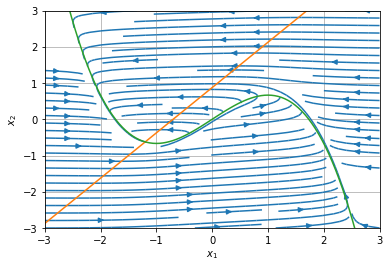

In [52]:
t = 0
x1range = np.linspace(-3, 3, num=400) # Select the required x_1 range
x2range = np.linspace(-3, 3, num=400) # Select the required x_2 range

# Fill the components of the vector field in the xrid points
U = np.zeros([len(x2range), len(x1range)])
V = np.zeros_like(U)
for i in range(len(x2range)):
    for j in range(len(x1range)):
        U[i,j], V[i,j] = f(t, [x1range[j], x2range[i]])

fig2 = plt.figure()
ax2 = fig2.subplots(1)
#ax2=ax

ax2.streamplot(x1range, x2range, U, V)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.grid()
#fig

ax2.set_ylim(-3,3)
ax2.plot(vrange, (vrange+A)/B)
ax2.plot(vrange, vrange-vrange**3/3+I)

A good touch if you want -- add _nullclines_. However, you have to solve the equations $\dot{f_i}=$ yourself first.

## Simple solution

Let us just solve the equations for some initial conditions and plot the solution.

Note the message `'The solver successfully reached the end of the integration interval.'`. It is good to check that it is the case -- sometimes the solver fails to do this!

In [15]:
I=0
A=0.7
B=0.8
EPS=0.08

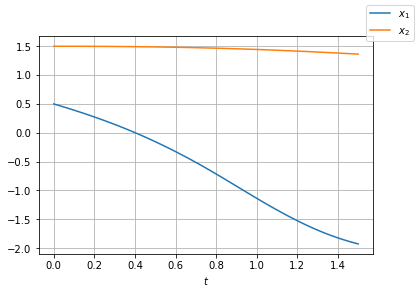

In [16]:
tspan = (0, 1.5) # time range for the solution
x0 = [0.5, 1.5]  # initial conditions

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
## Solve, and return solution at t_eval moments
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)
# print(xs)

fig2, ax2 = plt.subplots(1)

ax2.plot(xs.t, xs.y[0,:], label="$x_1$")
ax2.plot(xs.t, xs.y[1,:], label="$x_2$")
ax2.set_xlabel("$t$")
ax2.grid()
fig2.legend()

We can also plot the trajectory for the same solution

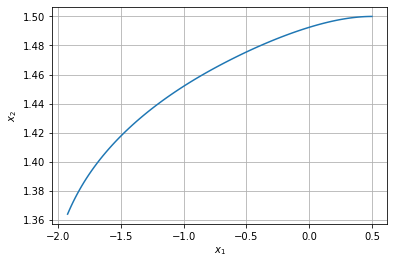

In [18]:
tspan = (0, 1.5) # time range for the solution
x0 = [0.5, 1.5]  # initial conditions

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
## Solve, and return solution at t_eval moments
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)

fig2, ax2 = plt.subplots(1)

ax2.plot(xs.y[0,:], xs.y[1,:])
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.grid()